## DATA Cleaning and EDA

In [1]:
# Import the libraries we will need
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math

# setting the visual
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline  

In [2]:
df = pd.read_csv('./input/dcrimeA.csv')
test = pd.read_csv('./input/Crime_Incidents_in_2018.csv')
ward_data =pd.read_csv('./input/warddata.csv')
hp = pd.read_csv('./input/house_sale.csv')

In [3]:
print (df.duplicated().sum())

0


# Checking Data Integrity

#### basic info and memory size of the files on the datasets

In [4]:
test.isnull().sum().sort_values(ascending=False)

BID                     11844
END_DATE                 2513
NEIGHBORHOOD_CLUSTER      171
CENSUS_TRACT               33
BLOCK_GROUP                33
PSA                         2
DISTRICT                    2
OBJECTID                    0
BLOCK                       0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
ANC                         0
XBLOCK                      0
YBLOCK                      0
WARD                        0
VOTING_PRECINCT             0
LATITUDE                    0
LONGITUDE                   0
START_DATE                  0
X                           0
dtype: int64

In [5]:
hp.columns

Index(['Unnamed: 0', 'region', 'month', 'year', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'new_listings', 'new_listings_mom',
       'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy',
       'days_on_market', 'days_on_market_mom', 'days_on_market_yoy',
       'average_sale_to_list', 'average_sale_to_list_mom',
       'average_sale_to_list_yoy'],
      dtype='object')

In [6]:
cols = ['region', 'month', 'year', 'median_sale_price','median_sale_price_mom', 
        'median_sale_price_yoy', 'homes_sold', 'days_on_market',
       'average_sale_to_list', 'average_sale_to_list_mom']

In [7]:
hp.groupby(['region', 'year', 'month'])[cols].agg(sum)[:5]

year  \
region                                             year month         
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr    2014   
                                                        Aug    2014   
                                                        Dec    2014   
                                                        Feb    2014   
                                                        Jan    2014   

                                                               median_sale_price  \
region                                             year month                      
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr                499.0   
                                                        Aug                545.0   
                                                        Dec                532.0   
                                                        Feb                531.0   
                                                        Jan                499.0   

                                                               median_sale_price_mom  \
region                                             year month                          
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr                      0.4   
                                                        Aug                      1.9   
                                                        Dec                     -1.5   
                                                        Feb                      6.5   
                                                        Jan                     -5.9   

                                                               median_sale_price_yoy  \
region                                             year month                          
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr                     10.9   
                                                        Aug                      9.0   
                                                        Dec                      0.4   
                                                        Feb                     16.7   
                                                        Jan                     19.3   

                                                               homes_sold  \
region                                             year month               
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr          66.0   
                                                        Aug          68.0   
                                                        Dec          76.0   
                                                        Feb          64.0   
                                                        Jan          58.0   

                                                               days_on_market  \
region                                             year month                   
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr                42   
                                                        Aug                26   
                                                        Dec                37   
                                                        Feb                53   
                                                        Jan                47   

                                                               average_sale_to_list  \
region                                             year month                         
Washington, DC - 16th Street Heights-Crestwood-... 2014 Apr                    98.4   
                                                        Aug                    98.2   
                                                        Dec                    99.0   
                                                        Feb                    98.7   
                                                        Jan                    99.6   

                        

In [8]:
hp.groupby(['region', 'year'])[cols].agg(sum)[:4]

year  \
region                                             year          
Washington, DC - 16th Street Heights-Crestwood-... 2014  24168   
                                                   2015  24180   
                                                   2016  24192   
                                                   2017  24204   

                                                         median_sale_price  \
region                                             year                      
Washington, DC - 16th Street Heights-Crestwood-... 2014             6369.0   
                                                   2015             6340.0   
                                                   2016             6883.0   
                                                   2017             6977.0   

                                                         median_sale_price_mom  \
region                                             year                          
Washington, DC - 16th Street Heights-Crestwood-... 2014                    1.7   
                                                   2015                  -14.8   
                                                   2016                   22.1   
                                                   2017                    6.8   

                                                         median_sale_price_yoy  \
region                                             year                          
Washington, DC - 16th Street Heights-Crestwood-... 2014                  161.4   
                                                   2015                   -0.7   
                                                   2016                  110.4   
                                                   2017                   24.6   

                                                         homes_sold  \
region                                             year               
Washington, DC - 16th Street Heights-Crestwood-... 2014       763.0   
                                                   2015       776.0   
                                                   2016       798.0   
                                                   2017       866.0   

                                                         days_on_market  \
region                                             year                   
Washington, DC - 16th Street Heights-Crestwood-... 2014             431   
                                                   2015             418   
                                                   2016             273   
                                                   2017             319   

                                                         average_sale_to_list  \
region                                             year                         
Washington, DC - 16th Street Heights-Crestwood-... 2014                1182.3   
                                                   2015                1196.7   
                                                   2016                1192.2   
                                                   2017                1192.7   

                                                         average_sale_to_list_mom  
region                                             year                            
Washington, DC - 16th Street Heights-Crestwood-... 2014                      -0.9  
                                                   2015                       0.9  
                                                   2016                      -1.2  
                                                   2017                       1.1

In [9]:
# checking the null values of the test and sorting them as percentage of the test shape
(test.isnull().sum()/test.shape[0]).sort_values(ascending=False)  

BID                     0.822157
END_DATE                0.174441
NEIGHBORHOOD_CLUSTER    0.011870
CENSUS_TRACT            0.002291
BLOCK_GROUP             0.002291
PSA                     0.000139
DISTRICT                0.000139
OBJECTID                0.000000
BLOCK                   0.000000
Y                       0.000000
CCN                     0.000000
REPORT_DAT              0.000000
SHIFT                   0.000000
METHOD                  0.000000
OFFENSE                 0.000000
ANC                     0.000000
XBLOCK                  0.000000
YBLOCK                  0.000000
WARD                    0.000000
VOTING_PRECINCT         0.000000
LATITUDE                0.000000
LONGITUDE               0.000000
START_DATE              0.000000
X                       0.000000
dtype: float64

In [10]:
ward_data.isnull().sum()/len(ward_data)

year              0.0
ANC               0.0
Housing_Prices    0.0
Unemployment      0.0
dtype: float64

In [11]:
hp.isnull().sum()/len(hp)

Unnamed: 0                  0.0
region                      0.0
month                       0.0
year                        0.0
median_sale_price           0.0
median_sale_price_mom       0.0
median_sale_price_yoy       0.0
homes_sold                  0.0
homes_sold_mom              0.0
homes_sold_yoy              0.0
new_listings                0.0
new_listings_mom            0.0
new_listings_yoy            0.0
inventory                   0.0
inventory_mom               0.0
inventory_yoy               0.0
days_on_market              0.0
days_on_market_mom          0.0
days_on_market_yoy          0.0
average_sale_to_list        0.0
average_sale_to_list_mom    0.0
average_sale_to_list_yoy    0.0
dtype: float64

In [12]:
import geopandas as gpd
import pandas as pd

In [13]:
df = pd.read_csv('./input/dcrimeA.csv')

In [14]:
# https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe
from shapely.geometry import Point

In [15]:
df.head()[0:2]

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,Cluster 25,010600 2,10600.0,Precinct 83,38.901916,-76.999516,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,Cluster 25,010600 1,10600.0,Precinct 83,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031


In [16]:
# Longitude comes first here!
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
df.drop(['LONGITUDE', 'LATITUDE'], axis=1, inplace=True)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

In [17]:
gdf.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,START_DATE,END_DATE,OBJECTID,geometry
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,104.0,Cluster 25,010600 2,10600.0,Precinct 83,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,POINT (-76.9995158028952 38.9019160631833)
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,506.0,Cluster 25,010600 1,10600.0,Precinct 83,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,POINT (-76.99553827514551 38.9050238607243)
2,2,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.0,...,603.0,Cluster 32,007703 3,7703.0,Precinct 107,NaN,2011-07-17T02:28:00.000Z,NaN,167293017,POINT (-76.94889425531629 38.88567180373229)
3,3,-76.967571,38.855724,11141272,2012-06-25T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2800 - 2899 BLOCK OF BUENA VISTA TERRACE SE,402815.0,...,702.0,Cluster 36,007502 2,7502.0,Precinct 134,NaN,2011-09-26T06:45:00.000Z,2011-09-26T06:55:00.000Z,167296016,POINT (-76.967568269531 38.85571652660021)
4,4,-76.939620,38.910718,11158196,2012-01-05T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,4280 - 4499 BLOCK OF DOUGLAS STREET NE,405237.0,...,601.0,Cluster 29,009601 1,9601.0,Precinct 92,NaN,2011-10-27T18:35:00.000Z,2011-10-27T00:00:00.000Z,167299077,POINT (-76.9396177835367 38.9107106263643)


In [18]:
psa = gpd.read_file('Police_Service_Areas.geojson')

In [19]:
psa = psa[['PSA','geometry']]
psa.head()

,PSA,geometry
0,708,POLYGON ((-77.00373311312961 38.83098011380654...
1,706,POLYGON ((-76.97982547209897 38.83786582274727...
2,705,POLYGON ((-76.99230859217997 38.84420083957919...
3,707,POLYGON ((-76.99631340902138 38.84654051811096...
4,704,POLYGON ((-76.97453810736511 38.85272679863991...


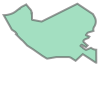

In [20]:
psa['geometry'][8]

In [21]:
geo_df = gpd.sjoin(gdf, psa, how='left', op='within')

In [22]:
geo_df.head()[0:2]

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,START_DATE,END_DATE,OBJECTID,geometry,index_right,PSA_right
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,010600 2,10600.0,Precinct 83,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,POINT (-76.9995158028952 38.9019160631833),20,104
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,010600 1,10600.0,Precinct 83,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,POINT (-76.99553827514551 38.9050238607243),25,506


In [23]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD',
       'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'BID', 'START_DATE', 'END_DATE', 'OBJECTID',
       'geometry'],
      dtype='object')

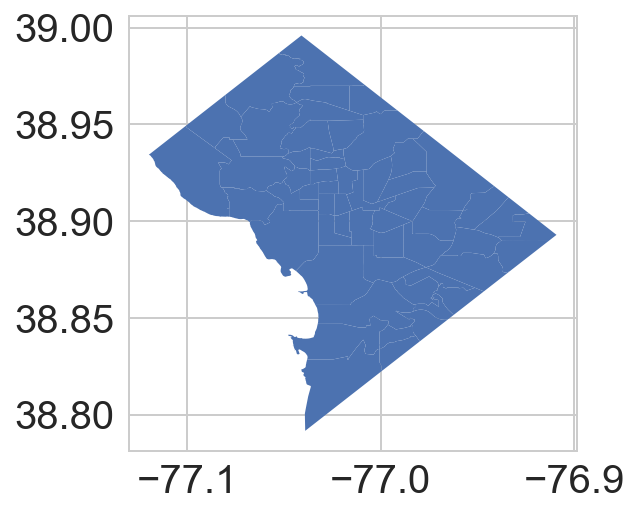

In [24]:
# read in psa shapefile and reproject
psa1 = gpd.read_file('Police_Service_Areas.geojson')
psa1 = psa1.to_crs(crs={'init': 'epsg:4326'})
psa1.plot()

In [25]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD',
       'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'BID', 'START_DATE', 'END_DATE', 'OBJECTID',
       'geometry'],
      dtype='object')

In [26]:
# read in crime  data as a csv
mpd = pd.read_csv('./input/dcrimeA.csv')

In [27]:
# constructing a GeoDataFrame from pandas data frame
type(psa1.geometry[0])

shapely.geometry.polygon.Polygon

In [28]:
geometry = [Point(xy) for xy in zip(mpd.LONGITUDE, mpd.LATITUDE)]
geometry[:5]

In [29]:
mpd_gdf = gpd.GeoDataFrame(mpd, crs = {'init': 'epsg:4326'}, geometry=geometry)

In [30]:
mpd_gdf.head()[0:3]

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,geometry
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,...,010600 2,10600.0,Precinct 83,38.901916,-76.999516,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019,POINT (-76.9995158028952 38.9019160631833)
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,...,010600 1,10600.0,Precinct 83,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031,POINT (-76.99553827514551 38.9050238607243)
2,2,-76.948897,38.885680,11102619,2012-05-14T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,153 - 399 BLOCK OF RIDGE ROAD SE,404434.0,...,007703 3,7703.0,Precinct 107,38.885672,-76.948894,NaN,2011-07-17T02:28:00.000Z,NaN,167293017,POINT (-76.94889425531629 38.88567180373229)


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


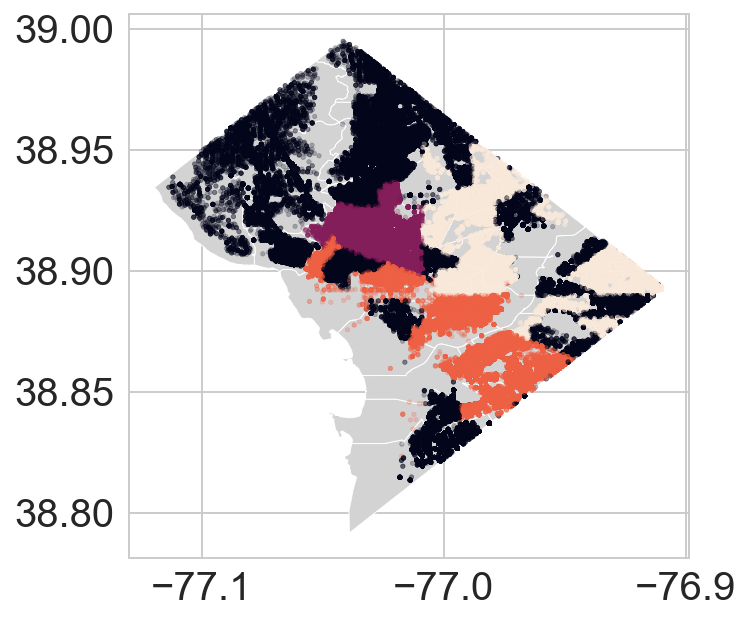

In [31]:
ax = psa.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
mpd_gdf.plot(scheme='quantiles', markersize=5, column='CENSUS_TRACT', alpha=0.25, ax=ax)

In [32]:
# first ensure that the two geodataframes have the same projection
psa1.crs == mpd_gdf.crs

True

In [33]:
# goal: find the average mpd crime per PSA

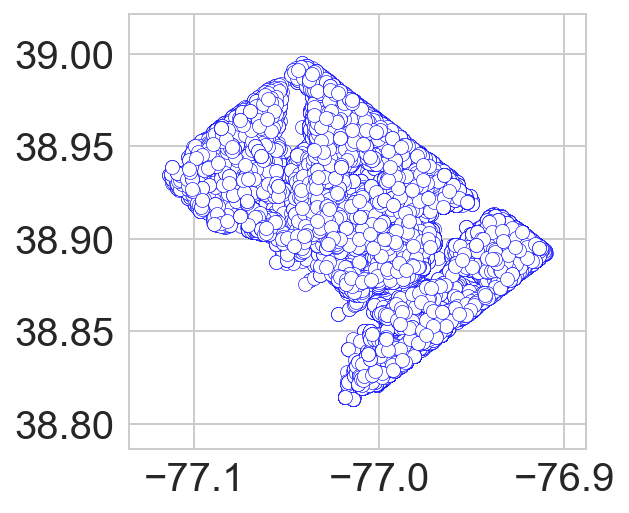

In [39]:
# plot GeoDataFrame
mpd_gdf.plot(color='white', edgecolor='blue');

In [34]:
# df.to_csv('./input/dc_crime2A.csv')
# test.to_csv('./input/dc_crimetest.csv')